<a href="https://colab.research.google.com/github/promahaque2003-commits/Milestones/blob/main/Milestone_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 6: Conditional Probability, Independence, Bayes’ Rule, and Probability Distributions

**Objective:** Apply concepts of Conditional Probability, Independence, Bayes’ Rule, and the Normal Probability Distribution to a real-world dataset.

**Instructions:** Complete the code and analysis in the sections below. Replace the placeholder values and comments with your specific variable names, events, calculations, and interpretations.

## A. Setup and Data Loading

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

# Load your dataset (Replace 'your_data.csv' with your actual file name)
try:
    df = pd.read_csv('insurance (2).csv')
    # Display the first few rows and info to confirm load
    print("Data loaded successfully:")
    display(df.head())
    df.info()
except FileNotFoundError:
    print("Error: 'your_data.csv' not found. Please update the file path.")
    # Create a dummy DataFrame if the file isn't found, for structure (students should replace this)
    data = {'bmi': [ 28, 33, 26, 29, 28],
            'Sex': ['female', 'male', 'female', 'male', 'female'],
            'Age': [19, 28, 31, 32, 37]}
    df = pd.DataFrame(data)


# --- Data Preprocessing (Optional: Add your cleaning/filtering steps here) ---
# Example: df = df.dropna(subset=['Score', 'Section'])

Data loaded successfully:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## C. Task 1: Define Events

Select two variables from your dataset (e.g., `Score` and `Section`). Define at least three events based on these variables.

| Event | Description (in words) | Mathematical Notation |
| :--- | :--- | :--- |
| **A** | [e.g., Student scored 'High Marks' ($>80$)] | $A$: $\text{Score} > 80$ |
| **B** | [e.g., Student is in 'Section A'] | $B$: $\text{Section} = 'A'$ |
| **C** | [e.g., Student is 'Older' (Age $\ge 22$)] | $C$: $\text{Age} \ge 22$ |

In [15]:
# --- Define helper functions/filters for the events (A and B) based on your DataFrame ---

# Example: Define Event A: Score > 80
# Replace 'Score' and 80 with your actual variable and threshold
filter_A = df['age'] > 20
count_A = len(df[filter_A])

# Example: Define Event B: Section = 'A'
# Replace 'Section' and 'A' with your actual variable and category
filter_B = df['sex'] == 'female'
count_B = len(df[filter_B])

# Event A AND B (Intersection)
filter_A_and_B = filter_A & filter_B
count_A_and_B = len(df[filter_A_and_B])

N = len(df) # Total number of observations

print(f"Total Observations (N): {N}")
print(f"Count(A): {count_A}")
print(f"Count(B): {count_B}")
print(f"Count(A ∩ B): {count_A_and_B}")

Total Observations (N): 1338
Count(A): 1172
Count(B): 662
Count(A ∩ B): 582


## D. Task 2: Conditional Probability

### 💡 Knowledge Point: Conditional Probability

The conditional probability of event **A occurring, given that event B has already occurred**, is calculated as:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$

Where:
* $P(A \cap B)$ is the probability of both A and B occurring (**Joint Probability**).
* $P(B)$ is the probability of B occurring (**Marginal Probability**).

Compute $P(A)$, $P(B)$, and $P(A \mid B)$ for your chosen events A and B.

In [16]:
# 1. Compute P(A) and P(B)
P_A = count_A / N
P_B = count_B / N

# 2. Compute P(A ∩ B)
P_A_and_B = count_A_and_B / N

# 3. Compute P(A | B) using the formula
P_A_given_B = P_A_and_B / P_B

print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A | B) = {P_A_given_B:.4f}")

P(A) = 0.8759
P(B) = 0.4948
P(A | B) = 0.8792


### Interpretation

1. **$P(A)$ Interpretation:** [Write your interpretation here, e.g., The probability that a student scored High Marks (>80) is $P(A)$].

2. **$P(B)$ Interpretation:** [Write your interpretation here, e.g., The probability that a student is in Section A is $P(B)$].

3. **$P(A \mid B)$ Interpretation (Conditional Probability):** [Write your interpretation here, e.g., The probability that a student scored High Marks (>80) **GIVEN** that they are from Section A is $P(A \mid B)$].

## E. Task 3: Independence Check

### 💡 Knowledge Point: Independence of Events

Two events $A$ and $B$ are **independent** if the occurrence of one does not affect the probability of the other. Mathematically, this is checked by the **Multiplication Rule for Independent Events**:

$$
P(A \cap B) = P(A) P(B)
$$

If $P(A \cap B) \neq P(A) P(B)$, the events are **dependent**.

Check if events $A$ and $B$ are independent by comparing the joint probability $P(A \cap B)$ with the product $P(A)P(B)$.

In [17]:
product_P_A_P_B = P_A * P_B

print(f"P(A ∩ B) (Empirical Joint Prob): {P_A_and_B:.4f}")
print(f"P(A) * P(B) (Product of Marginal Probs): {product_P_A_P_B:.4f}")

difference = abs(P_A_and_B - product_P_A_P_B)

# Check for approximate equality (Use a small tolerance for 'independence')
if difference < 0.01:
    print("\nConclusion: P(A ∩ B) is approximately equal to P(A)P(B).")
    print("The events A and B are **Independent**.")
else:
    print("\nConclusion: P(A ∩ B) is NOT equal to P(A)P(B).")
    print("The events A and B are **Dependent**.")

P(A ∩ B) (Empirical Joint Prob): 0.4350
P(A) * P(B) (Product of Marginal Probs): 0.4334

Conclusion: P(A ∩ B) is approximately equal to P(A)P(B).
The events A and B are **Independent**.


## F. Task 4: Bayes' Rule

### 💡 Knowledge Point: Bayes' Rule

Bayes' Rule allows us to **reverse the conditional probability**. If we know $P(A \mid B)$, we can find $P(B \mid A)$ using the following formula:

$$
P(B \mid A) = \frac{P(A \mid B)\,P(B)}{P(A)}
$$

Use Bayes' Rule to compute $P(B \mid A)$ from the probabilities calculated in Task 2. Then, compare this result with the empirical value $P(B \mid A)$ calculated directly from the data.

In [18]:
# 1. Compute P(B | A) using Bayes' Rule
P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A

# 2. Compute P(B | A) empirically from the dataset (P(A ∩ B) / P(A))
P_B_given_A_Empirical = P_A_and_B / P_A

print(f"P(A | B) (from Task 2): {P_A_given_B:.4f}")
print(f"P(A) (from Task 2): {P_A:.4f}")
print(f"P(B) (from Task 2): {P_B:.4f}")
print("\n---")
print(f"P(B | A) via Bayes' Rule: {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical: {P_B_given_A_Empirical:.4f}")

# The two values should be mathematically identical (within floating point error)
print(f"Difference: {abs(P_B_given_A_Bayes - P_B_given_A_Empirical):.8f}")

P(A | B) (from Task 2): 0.8792
P(A) (from Task 2): 0.8759
P(B) (from Task 2): 0.4948

---
P(B | A) via Bayes' Rule: 0.4966
P(B | A) Empirical: 0.4966
Difference: 0.00000000


## G. Task 5: Probability Distribution (Normal Only)

### G1. Explore a Numerical Variable

### 💡 Knowledge Point: Normal Distribution

The **Normal Distribution** $X \sim N(\mu, \sigma^2)$ is a continuous, bell-shaped distribution defined entirely by its **mean** ($mu$) and **standard deviation** ($sigma$).

The **68-95-99.7 Rule** states that approximately:
* **68%** of data falls within $\mu \pm 1\sigma$.
* **95%** of data falls within $\mu \pm 2\sigma$.

Select a numerical variable (e.g., `Score`) and analyze its fit to the Normal Distribution.

Selected Variable: bmi
Mean (μ): 30.66
Standard Deviation (σ): 6.10


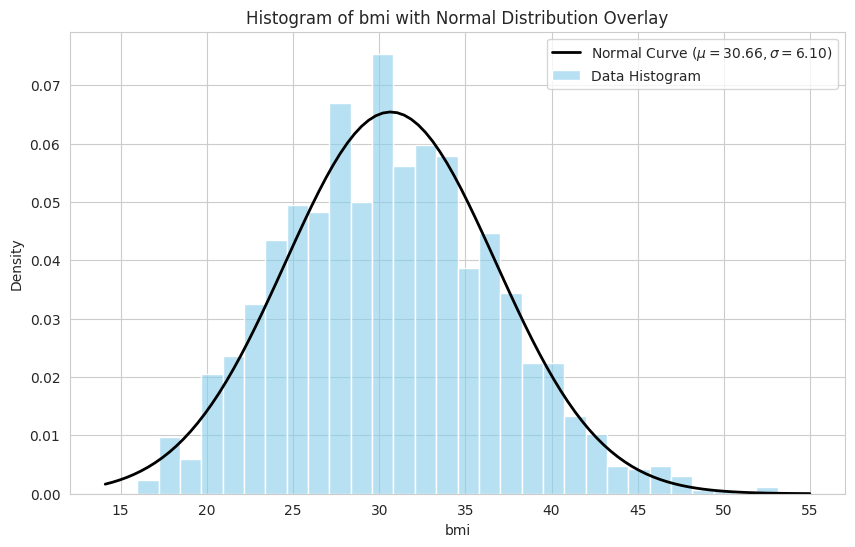

In [20]:
# Select your numerical variable
numerical_variable = 'bmi' # REPLACE with your chosen numerical variable
data_series = df[numerical_variable]

# 1. Compute Mean (μ) and Standard Deviation (σ)
mu = data_series.mean()
sigma = data_series.std()

print(f"Selected Variable: {numerical_variable}")
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

# 2. Plot Histogram and Overlay Normal Curve
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
sns.histplot(data_series, bins=30, kde=False, color='skyblue', alpha=0.6, stat="density", label='Data Histogram')

# Generate points for the theoretical Normal Distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma) # Probability Density Function (PDF)

# Plot the Normal Distribution curve
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\\mu={mu:.2f}, \\sigma={sigma:.2f}$)')

title = f"Histogram of {numerical_variable} with Normal Distribution Overlay"
plt.title(title)
plt.xlabel(numerical_variable)
plt.ylabel('Density')
plt.legend()
plt.show()


### G2. Normal Probability Questions

### 💡 Knowledge Point: Calculating Normal Probabilities

We use the `scipy.stats.norm` functions for calculating theoretical probabilities:
* **`norm.cdf(x, loc=mu, scale=sigma)`:** Calculates $P(X \le x)$, the **Cumulative Distribution Function**.
* **`norm.sf(x, loc=mu, scale=sigma)`:** Calculates $P(X > x)$, the **Survival Function**.

Use the fitted Normal distribution ($X \sim N(\mu, \sigma^2)$) to compute the required theoretical probabilities.

In [22]:
# 1. P(X > μ)
# Use the Survival Function (SF) for P(X > x)
P_greater_mu = norm.sf(mu, loc=mu, scale=sigma)

# 2. P(μ - σ < X < μ + σ) - Probability within 1 sigma
lower_1sigma = mu - sigma
upper_1sigma = mu + sigma
# P(Upper) - P(Lower) = P(a < X < b)
P_1sigma = norm.cdf(upper_1sigma, loc=mu, scale=sigma) - norm.cdf(lower_1sigma, loc=mu, scale=sigma)

# 3. P(X < μ - 2σ) - Probability less than 2 sigmas below the mean
# Use the Cumulative Distribution Function (CDF) for P(X <= x)
lower_2sigma = mu - 2 * sigma
P_less_2sigma = norm.cdf(lower_2sigma, loc=mu, scale=sigma)

print(f"Theoretical Probabilities based on N({mu:.2f}, {sigma**2:.2f}):")
print(f"P(X > μ) = {P_greater_mu:.4f}")
print(f"P({lower_1sigma:.2f} < X < {upper_1sigma:.2f}) [1σ range] = {P_1sigma:.4f}")
print(f"P(X < {lower_2sigma:.2f}) [Less than μ-2σ] = {P_less_2sigma:.4f}")

print("\n--- Interpretation ---")
print(f"Interpretation 1: The theoretical probability of a [unit, e.g., student] having a {numerical_variable} **greater than the mean** is {P_greater_mu:.2%}.")
print(f"Interpretation 2: The theoretical probability of a [unit] having a {numerical_variable} **within one standard deviation** of the mean is {P_1sigma:.2%}.")
print(f"Interpretation 3: The theoretical probability of a [unit] having a {numerical_variable} **less than two standard deviations below the mean** is {P_less_2sigma:.2%}.")

Theoretical Probabilities based on N(30.66, 37.19):
P(X > μ) = 0.5000
P(24.57 < X < 36.76) [1σ range] = 0.6827
P(X < 18.47) [Less than μ-2σ] = 0.0228

--- Interpretation ---
Interpretation 1: The theoretical probability of a [unit, e.g., student] having a bmi **greater than the mean** is 50.00%.
Interpretation 2: The theoretical probability of a [unit] having a bmi **within one standard deviation** of the mean is 68.27%.
Interpretation 3: The theoretical probability of a [unit] having a bmi **less than two standard deviations below the mean** is 2.28%.


### G3. Are Your Data Normally Distributed?

Based on the visualization and descriptive statistics (Mean vs. Median), comment on the normality of the chosen variable.

In [23]:
# Compute Median for comparison
median = data_series.median()

print(f"Mean: {mu:.2f}")
print(f"Median: {median:.2f}")

print("\n--- Comment on Normality ---")
# [Write your analysis here]
print("The histogram [looks/does not look] like a perfect bell curve.")
print(f"The Mean ({mu:.2f}) and Median ({median:.2f}) are [close/far apart], which suggests [good/poor] symmetry.")
print("Overall, the data [shows/does not show] a strong indication of following a Normal Distribution. [Mention any skewness or heavy tails observed].")

Mean: 30.66
Median: 30.40

--- Comment on Normality ---
The histogram [looks/does not look] like a perfect bell curve.
The Mean (30.66) and Median (30.40) are [close/far apart], which suggests [good/poor] symmetry.
Overall, the data [shows/does not show] a strong indication of following a Normal Distribution. [Mention any skewness or heavy tails observed].


## H. Task 6: Reflection

Summarize your findings and discuss the broader implications of these concepts.

### Reflection Summary

1. **Conditional Probability's Effect:**
   [Discuss how the probability of one event (e.g., getting a high score, $P(A)$) changed when a condition was introduced (e.g., being from Section A, $P(A\mid B)$). Was the conditional probability much higher or lower than the marginal probability?]

2. **Independence of Events:**
   [State your finding from Task 3. If dependent, what real-world factor suggests that Variable 1 and Variable 2 might be related? If independent, what does that imply about the factors in your dataset?]

3. **Normal Distribution Fit:**
   [Summarize your conclusion from G3. Did the numerical variable fit the Normal distribution well? How might non-normality affect a statistical test that assumes normality?]

4. **Real-World Application:**
   [Provide a concrete example of how Bayes' Rule (e.g., medical diagnosis, security threat detection) or the Normal Distribution (e.g., quality control, setting performance benchmarks) is used in a real-world decision-making process.]

## I. Submission Checklist

* [ ] Data loaded correctly.
* [ ] Events A, B, and C clearly defined with mathematical notation.
* [ ] Conditional probability $P(A \mid B)$ calculated and interpreted.
* [ ] Independence checked by comparing $P(A \cap B)$ and $P(A)P(B)$.
* [ ] Bayes’ Rule calculation of $P(B \mid A)$ confirmed against empirical value.
* [ ] Mean and Standard Deviation computed for the numerical variable.
* [ ] Histogram plotted with Normal curve overlay.
* [ ] Three Normal probabilities computed and interpreted.
* [ ] Short comment on normality provided.
* [ ] Reflection summary completed.